In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import math
import pickle
import seaborn as sns

from graspy.plot import heatmap

from simulations import rho_sbm_marg, rho_sbm_diff_block
from utils import sbm_params

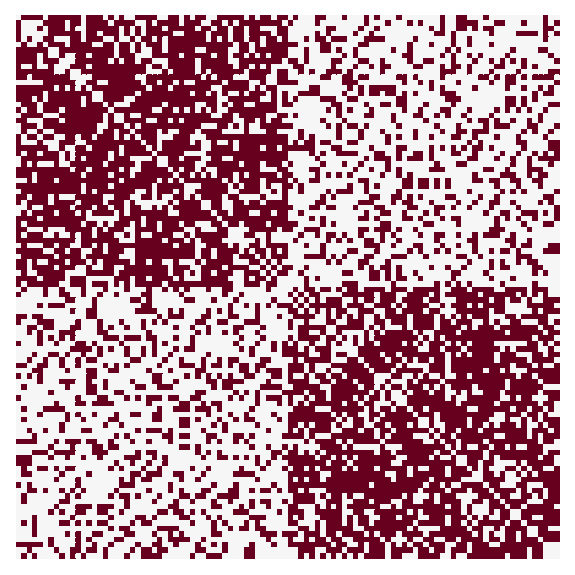

In [7]:
A, B = rho_sbm_marg(rho=0.1, k=2, AL=sbm_params(a=0.7, b=0.3), BL=sbm_params(a=0.2, b=0.5), n=100)
heatmap(A, cbar=False)
plt.savefig('../figures/sbm_diff_marg1.png')

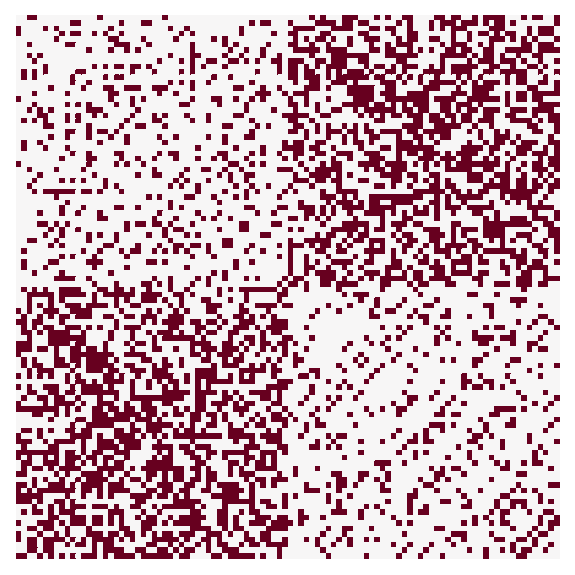

In [8]:
heatmap(B, cbar=False)
plt.savefig('../figures/sbm_diff_marg2.png')

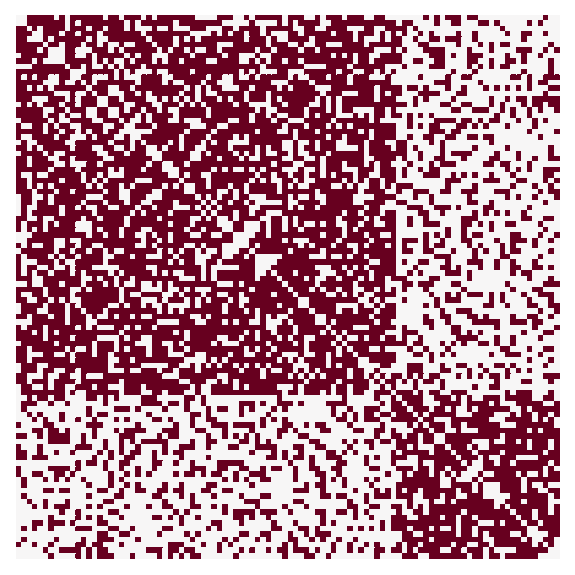

In [9]:
A, B = rho_sbm_diff_block(rho=0.1, k=[70, 30], AL=sbm_params(a=0.7, b=0.3), BL=sbm_params(a=0.2, b=0.5), n=100)
heatmap(A, cbar=False)
plt.savefig('../figures/sbm_diff_block1.png')

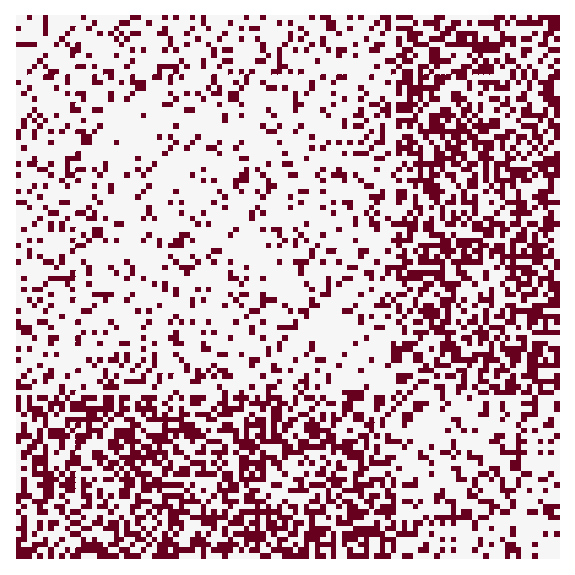

In [10]:
heatmap(B, cbar=False)
plt.savefig('../figures/sbm_diff_block2.png')

In [2]:
n_arr = np.linspace(10, 100, 10, dtype=int)
mpl.style.use('seaborn')

plt.figure(figsize=(8, 6))
colors = {
    'mgc': 'red',
    'dcorr': 'blue', 
    'pearson': 'orange'
}

plt.rcParams['xtick.labelsize']=16
plt.rcParams['ytick.labelsize']=16
legend_size = 16
label_size = 18

<Figure size 576x432 with 0 Axes>

In [15]:
with open ('../results/rho_er_power.pkl', 'rb') as f:
    power_results = pickle.load(f)

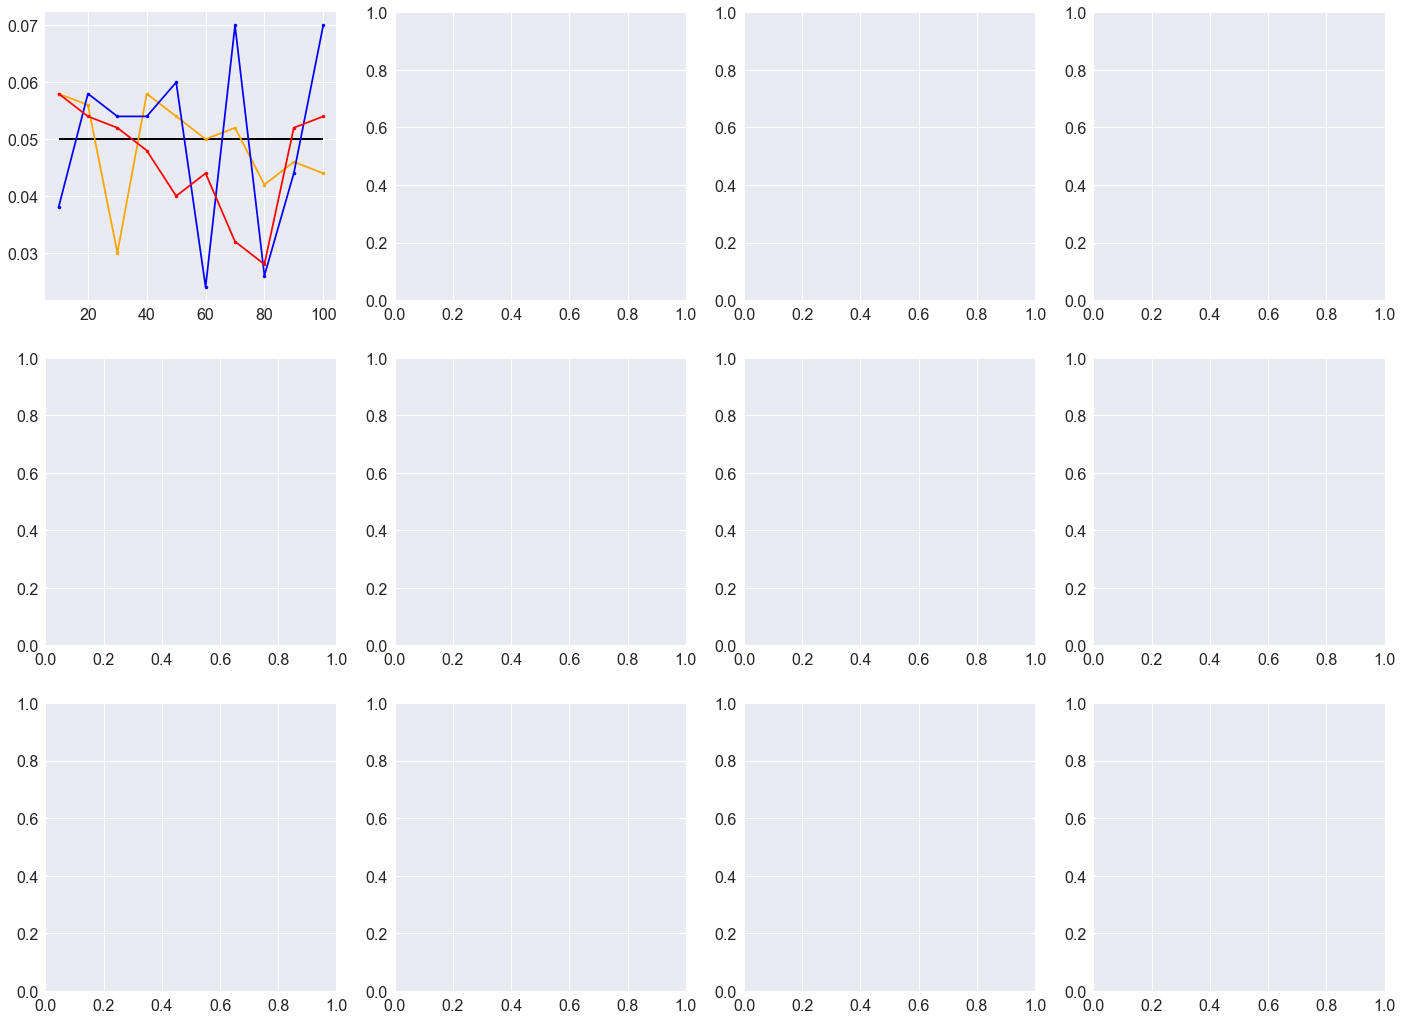

In [47]:
fig, axs = plt.subplots(3, 4, figsize=(24, 18), squeeze=True)
axs = axs.reshape(-1)
for name, test_power in power_results.items():
    axs[0].plot(n_arr, test_power[0, :], color=colors[name], linestyle='-', marker='.', label='{}'.format(name))
    axs[0].hlines(y=0.05, xmin=np.amin(n_arr), xmax=np.amax(n_arr), label='alpha')

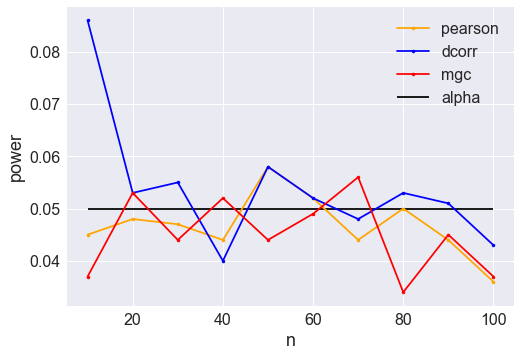

In [26]:
with open ('../results/rho_er_power_null.pkl', 'rb') as f:
    power_results = pickle.load(f)

for name, test_power in power_results.items():
        plt.plot(n_arr, test_power[0, :], color=colors[name], linestyle='-', marker='.', label='{}'.format(name))

plt.hlines(y=0.05, xmin=np.amin(n_arr), xmax=np.amax(n_arr), label='alpha')
plt.legend(prop={'size': legend_size})
plt.xlabel('n', fontsize=label_size)
plt.ylabel('power', fontsize=label_size)
plt.savefig('../figures/er_power_null.png', bbox_inches='tight')

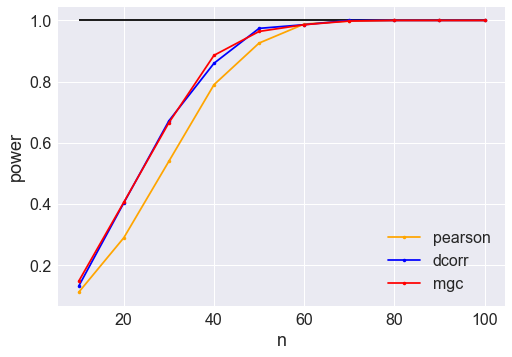

In [7]:
with open ('../results/rho_er_power.pkl', 'rb') as f:
    power_results = pickle.load(f)

rho = 0.1
for name, test_power in power_results.items():
        plt.plot(n_arr, test_power[1, :], color=colors[name], linestyle='-', marker='.', label='{}'.format(name))

plt.hlines(y=1, xmin=np.amin(n_arr), xmax=np.amax(n_arr))
plt.legend(loc=4, prop={'size': legend_size})
plt.xlabel('n', fontsize=label_size)
plt.ylabel('power', fontsize=label_size)
plt.savefig('../figures/er_power_alt.png'.format(rho), bbox_inches='tight')

In [8]:
with open ('../results/rho_er_marg_power.pkl', 'rb') as f:
    power_results = pickle.load(f)

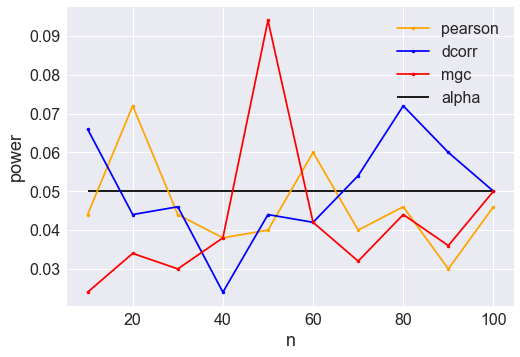

In [10]:
rho = 0
for name, test_power in power_results.items():
        plt.plot(n_arr, test_power[0, :], color=colors[name], linestyle='-', marker='.', label='{}'.format(name))

plt.hlines(y=0.05, xmin=np.amin(n_arr), xmax=np.amax(n_arr), label='alpha')
plt.legend(prop={'size': legend_size})
plt.xlabel('n', fontsize=label_size)
plt.ylabel('power', fontsize=label_size)
plt.savefig('../figures/er_marg_power_null.png', bbox_inches='tight')

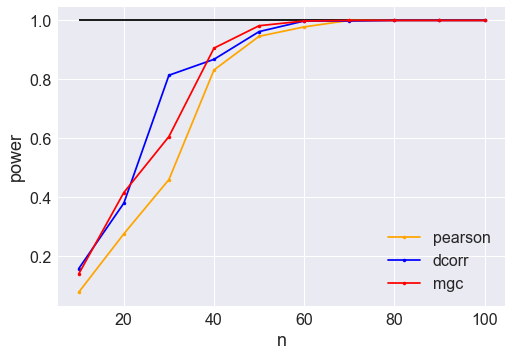

In [11]:
rho = 0.1
for name, test_power in power_results.items():
        plt.plot(n_arr, test_power[1, :], color=colors[name], linestyle='-', marker='.', label='{}'.format(name))

plt.hlines(y=1, xmin=np.amin(n_arr), xmax=np.amax(n_arr))
plt.legend(loc=4, prop={'size': legend_size})
plt.xlabel('n', fontsize=label_size)
plt.ylabel('power', fontsize=label_size)
plt.savefig('../figures/er_marg_power_alt.png'.format(rho), bbox_inches='tight')

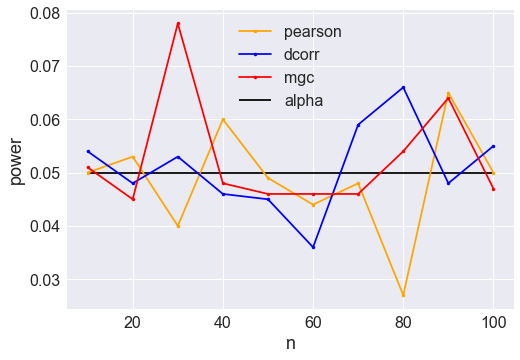

In [15]:
with open ('../results/rho_sbm_power_null.pkl', 'rb') as f:
    power_results = pickle.load(f)

for name, test_power in power_results.items():
        plt.plot(n_arr, test_power[0, :], color=colors[name], linestyle='-', marker='.', label='{}'.format(name))

plt.hlines(y=0.05, xmin=np.amin(n_arr), xmax=np.amax(n_arr), label='alpha')
plt.legend(prop={'size': legend_size})
plt.xlabel('n', fontsize=label_size)
plt.ylabel('power', fontsize=label_size)
plt.savefig('../figures/sbm_power_null.png', bbox_inches='tight')

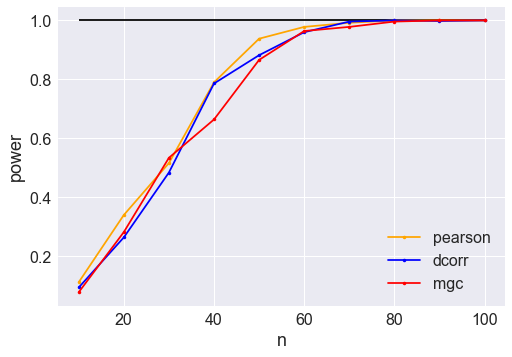

In [12]:
with open ('../results/rho_sbm_power.pkl', 'rb') as f:
    power_results = pickle.load(f)

for name, test_power in power_results.items():
        plt.plot(n_arr, test_power[1, :], color=colors[name], linestyle='-', marker='.', label='{}'.format(name))

plt.hlines(y=1, xmin=np.amin(n_arr), xmax=np.amax(n_arr))
plt.legend(loc=4, prop={'size': legend_size})
plt.xlabel('n', fontsize=label_size)
plt.ylabel('power', fontsize=label_size)
plt.savefig('../figures/sbm_power_alt.png', bbox_inches='tight')

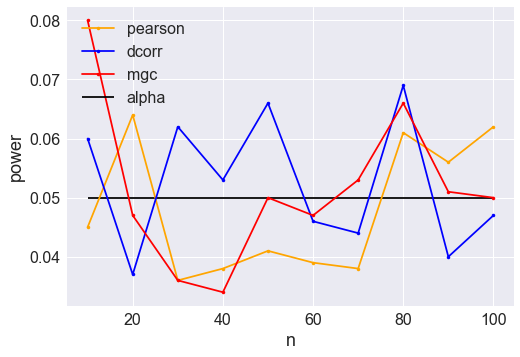

In [16]:
with open ('../results/rho_sbm_marg_power_null.pkl', 'rb') as f:
    power_results = pickle.load(f)
    
for name, test_power in power_results.items():
    plt.plot(n_arr, test_power[0, :], color=colors[name], linestyle='-', marker='.', label='{}'.format(name))

plt.hlines(y=0.05, xmin=np.amin(n_arr), xmax=np.amax(n_arr), label='alpha')
plt.legend(prop={'size': legend_size})
plt.xlabel('n', fontsize=label_size)
plt.ylabel('power', fontsize=label_size)
plt.savefig('../figures/sbm_marg_power_null.png', bbox_inches='tight')

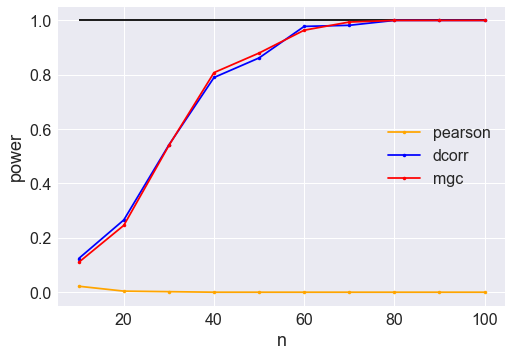

In [13]:
with open ('../results/rho_sbm_marg_power.pkl', 'rb') as f:
    power_results = pickle.load(f)

for name, test_power in power_results.items():
        plt.plot(n_arr, test_power[1, :], color=colors[name], linestyle='-', marker='.', label='{}'.format(name))

plt.hlines(y=1, xmin=np.amin(n_arr), xmax=np.amax(n_arr))
plt.legend(loc=7, prop={'size': legend_size})
plt.xlabel('n', fontsize=label_size)
plt.ylabel('power', fontsize=label_size)
plt.savefig('../figures/sbm_marg_power_alt.png', bbox_inches='tight')

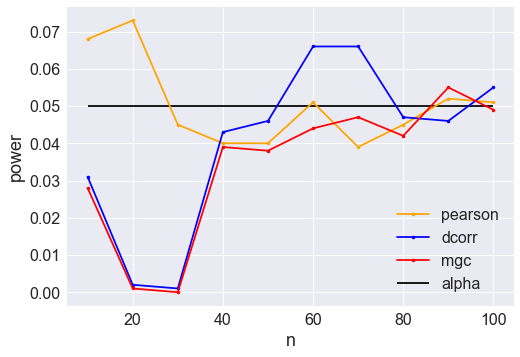

In [28]:
with open('../results/rho_sbm_marg_est_block_power.pkl', 'rb') as f:
    power_results = pickle.load(f)

for name, test_power in power_results.items():
    plt.plot(n_arr, test_power[0, :], color=colors[name], linestyle='-', marker='.', label='{}'.format(name))

plt.hlines(y=0.05, xmin=np.amin(n_arr), xmax=np.amax(n_arr), label='alpha')
plt.legend(loc=4, prop={'size': legend_size})
plt.xlabel('n', fontsize=label_size)
plt.ylabel('power', fontsize=label_size)
plt.savefig('../figures/sbm_marg_est_block_power_null.png', bbox_inches='tight')

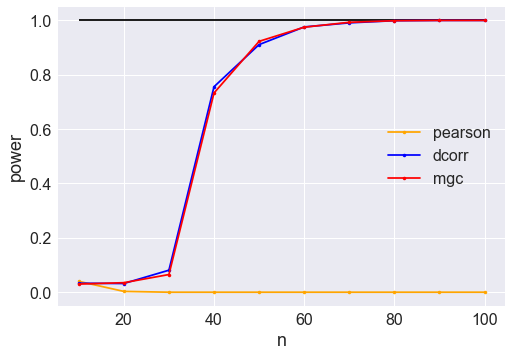

In [29]:
for name, test_power in power_results.items():
    plt.plot(n_arr, test_power[1, :], color=colors[name], linestyle='-', marker='.', label='{}'.format(name))

plt.hlines(y=1, xmin=np.amin(n_arr), xmax=np.amax(n_arr))
plt.legend(loc=7, prop={'size': legend_size})
plt.xlabel('n', fontsize=label_size)
plt.ylabel('power', fontsize=label_size)
plt.savefig('../figures/sbm_marg_est_block_power_alt.png'.format(rho), bbox_inches='tight')

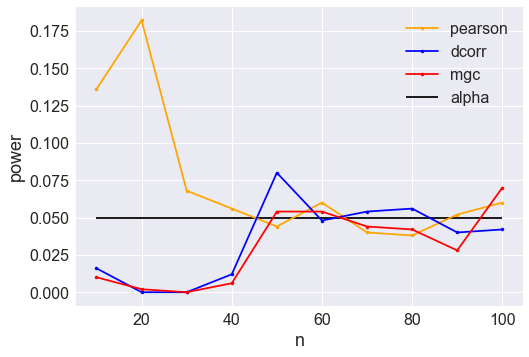

In [24]:
with open('../results/rho_sbm_diff_block_power.pkl', 'rb') as f:
    power_results = pickle.load(f)

for name, test_power in power_results.items():
    plt.plot(n_arr, test_power[0, :], color=colors[name], linestyle='-', marker='.', label='{}'.format(name))

plt.hlines(y=0.05, xmin=np.amin(n_arr), xmax=np.amax(n_arr), label='alpha')
plt.legend(loc=1, prop={'size': legend_size})
plt.xlabel('n', fontsize=label_size)
plt.ylabel('power', fontsize=label_size)
plt.savefig('../figures/sbm_diff_block_power_null.png', bbox_inches='tight')

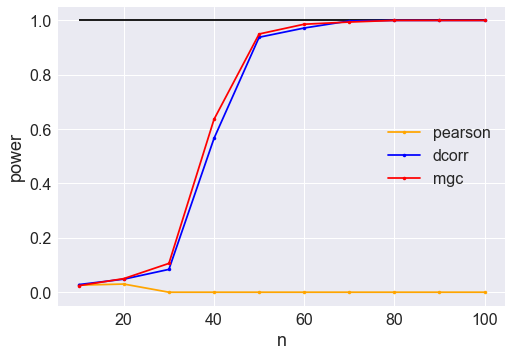

In [25]:
for name, test_power in power_results.items():
        plt.plot(n_arr, test_power[1, :], color=colors[name], linestyle='-', marker='.', label='{}'.format(name))

plt.hlines(y=1, xmin=np.amin(n_arr), xmax=np.amax(n_arr))
plt.legend(loc=7, prop={'size': legend_size})
plt.xlabel('n', fontsize=label_size)
plt.ylabel('power', fontsize=label_size)
plt.savefig('../figures/sbm_diff_block_power_alt.png'.format(rho), bbox_inches='tight')